In [388]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import os

[[52.22222222]]
(202, 68)


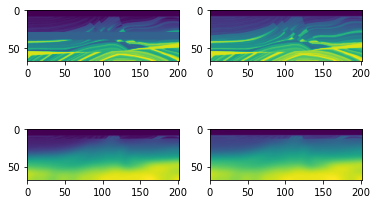

4698.273618344907
1499.9999999999998
2748.6038471739976
0.0
(202, 68)


In [389]:
model_name = "models/marmousi2-model-true.mat"
smooth_model_name = "models/marmousi2-model-smooth.mat"
model = sio.loadmat(model_name)
smooth_model = sio.loadmat(smooth_model_name)

# print(src)
vs = model['vs']
vp = model['vp']
rho = model['rho']
init_vp = smooth_model['vp']
init_vs = smooth_model['vs']
init_rho = smooth_model['rho']
x, z = vp.shape
print(model['dx'])
print(np.shape(vp))
# vs[:, :10] = vs[10, 9]
# init_vs[:, :10] = init_vs[10, 9]




# vs = vp * 0.6
# init_vs = init_vp * 0.6

# vs[:, 22:27] = 1700
vp[:, 30:40] = 2500
# vs[:, 9] = 500
# vs[:, 8] = 400
# vs[:, 7] = 300
# vs[:, 6] = 200
# vs[:, 5] = 100
# vp[:, 20:30] = 4000
# vs[:, 26:33] = 1800

init_vs[:, :14] = vs[:, :14]
init_vp[:, :14] = vp[:, :14]
init_rho[:, :14] = rho[:, :14]
# plt.plot(vp[10, :12])
# plt.plot(vs[10, :12])
# plt.plot(init_vp[10, :12])
# plt.plot(init_vs[10, :12])




plt.subplot(221)
plt.imshow(vp.T)
plt.subplot(222)
plt.imshow(vs.T)
plt.subplot(223)
plt.imshow(init_vp.T)
plt.subplot(224)
plt.imshow(init_vs.T)
plt.show()
print(np.max(vp))
print(np.min(vp))
print(np.max(vs))
print(np.min(vs))
np.save("models/vs.npy", vs)
np.save("models/vp.npy", vp)
np.save("models/rho.npy", rho)
np.save("models/init_vs.npy", init_vs)
np.save("models/init_vp.npy", init_vp)
np.save("models/init_rho.npy", init_rho)
print(np.shape(init_vs))


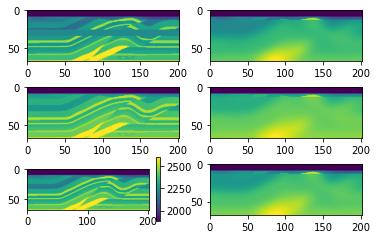

5500.0
3323.1
1500.0
0.0
2602.6249999999995
1880.625


In [390]:
vp = np.load('models/vp_over_raw.npy')[:202, :68]
vs = np.load('models/vs_over_raw.npy')[:202, :68]
rho = np.load('models/rho_over_raw.npy')[:202, :68] *1e3

sigma = 7
init_vp = vp.copy()
init_vp[:, 11:] = gaussian_filter(vp[:, 11:], [sigma,sigma], mode='reflect')

init_vs = vs.copy()
init_vs[:, 11:] = gaussian_filter(vs[:, 11:], [sigma,sigma], mode='reflect')

init_rho = rho.copy()
init_rho[:, 11:] = gaussian_filter(rho[:, 11:], [sigma,sigma], mode='reflect')

# init_rho[:, :11] = rho[:, :11]

# nx=202
# init_vp = np.mean(init_vp, axis=0, keepdims=True).repeat(nx, axis=0)
# init_vs = np.mean(init_vs, axis=0, keepdims=True).repeat(nx, axis=0)

init_vp[:, :14] = vp[:, :14]
init_vs[:, :14] = vs[:, :14]
init_rho[:, :14] = rho[:, :14]
vp[:, 27:35] = 3400
# vs[:, 35:48] = 2500
# rho[:, 40:50] = 2.3

vs[:, :10] = 0
init_vs[:, :10] = 0


# for i in range(x):
#     for j in range(z):
#         if (((i-100)**2+(j-40)**2)<=225):
#             vp[i, j] = 3500

# for i in range(x):
#     for j in range(z):
#         if (((i-150)**2+(j-40)**2)<=225):
#             vs[i, j] = 2500


# plt.plot(vp[10, :])
# plt.plot(vs[10, :])
# # plt.plot(rho[10, :])
# plt.plot(init_vp[10, :])
# plt.plot(init_vs[10, :])
# plt.plot(init_rho[10, :])
np.save('models/vp_over.npy', vp)
np.save('models/vs_over.npy', vs)
np.save('models/rho_over.npy', rho)
np.save('models/init_vp_over.npy', init_vp)
np.save('models/init_vs_over.npy', init_vs)
np.save('models/init_rho_over.npy', init_rho)
plt.subplot(321)
plt.imshow(vp.T)
plt.subplot(322)
plt.imshow(init_vp.T)
plt.subplot(323)
plt.imshow(vs.T)
plt.subplot(324)
plt.imshow(init_vs.T)
plt.subplot(325)
plt.imshow(rho.T)
plt.colorbar()
plt.subplot(326)
plt.imshow(init_rho.T)
# print(np.max(np.abs((vp - init_vp)/init_vp)))
# print(np.max(np.abs((vs - init_vs)/init_vs)))
plt.show()
sio.savemat(os.path.join('models', 'over_thrust_model.mat'),
         {"vp" : vp, 
         "vs" : vs, 
         "init_vp" : init_vp, 
         "init_vs" : init_vs, 
         "dx" : np.squeeze(model['dx']),
         "dy" : np.squeeze(model['dy']),
         "dt" : np.squeeze(model['dt']),
         "nx" : 202,
         "ny" : 68,
         "nt" : np.squeeze(model['nt']),
         "f0" : 3.0})
# plt.colorbar()
print(np.max(vp))
print(np.max(vs))
print(np.min(vp))
print(np.min(vs))
print(np.max(rho))
print(np.min(rho))


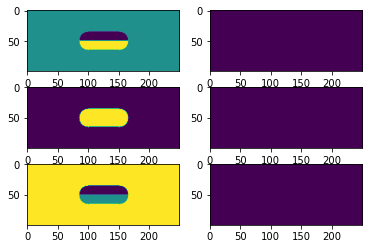

In [391]:
vp1 = 2.9e3
vp2 = 2.65e3
vp3 = 3.15e3

vs1 = 1.33e3
vs2 = 1.7e3
vs3 = 1.7e3

rho1 = 1.7e3
rho2 = 1.3e3
rho3 = 1.5e3

vp = vp1 * np.ones((250, 100))
vs = vs1 * np.ones((250, 100))
rho = rho1 * np.ones((250, 100))

init_vp = vp.copy()
init_vs = vs.copy()
init_rho = rho.copy()
vp_copy = vp.copy()
# vp[:, 80:] = 2700

x, z = vp.shape
for i in range(x):
    for j in range(z):
        if (((i-100)**2+(j-50)**2)<=225):
            vp[i, j] = vp2
            vp_copy[i, j] = vp3
        if (((i-150)**2+(j-50)**2)<=225):
            vp[i, j] = vp2
            vp_copy[i, j] = vp3
        

vp[100:150, 35:50] = vp2
vp_copy[100:150, 50:65] = vp3
vp[85:165, 50:65] = vp1
vp[:, 50:] = vp_copy[:, 50:]

vs[vp==vp2] = vs2
vs[vp==vp3] = vs3

rho[vp==vp2] = rho2
rho[vp==vp3] = rho3

sigma = 8
init_vp_s = vp.copy()
init_vp_s[:, 11:] = gaussian_filter(vp[:, 11:], [sigma,sigma], mode='reflect')

init_vs_s = vs.copy()
init_vs_s[:, 11:] = gaussian_filter(vs[:, 11:], [sigma,sigma], mode='reflect')

init_rho_s = rho.copy()
init_rho_s[:, 11:] = gaussian_filter(rho[:, 11:], [sigma,sigma], mode='reflect')


# rho[:, :110] = 2200

np.save('models/vp_trade.npy', vp)
np.save('models/vs_trade.npy', vs)
np.save('models/rho_trade.npy', rho)
np.save('models/init_vp_trade.npy', init_vp)
np.save('models/init_vs_trade.npy', init_vs)
np.save('models/init_rho_trade.npy', init_rho)

plt.subplot(321)
plt.imshow(vp.T)
plt.subplot(322)
plt.imshow(init_vp.T)
plt.subplot(323)
plt.imshow(vs.T)
plt.subplot(324)
plt.imshow(init_vs.T)
plt.subplot(325)
plt.imshow(rho.T)
plt.subplot(326)
plt.imshow(init_rho.T)
plt.show()
# np.save("../Mar_models/rho.npy", rho)
# np.save("../Mar_models/init_rho.npy", init_rho)

sio.savemat(os.path.join('models', 'trade_off_model.mat'),
         {"vp" : vp, 
         "vs" : vs, 
         "init_vp" : init_vp, 
         "init_vp_s" : init_vp_s, 
         "init_vs" : init_vs, 
         "init_vs_s" : init_vs_s, 
         "dx" : 50,
         "dy" : 50,
         "dt" : 0.0037037,
         "nx" : 250,
         "ny" : 100,
         "nt" : 1678,
         "f0" : 3.0})


[[1209]]


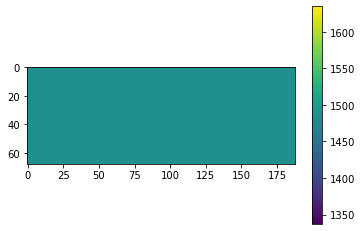

[[-0.00080385 -0.00107958 -0.00144618 ...  0.          0.
   0.        ]]
4510.000000000002
2706.000000000001
1486.0002441406245
891.6001464843747


In [392]:
model_name = "models/BP-model-true.mat"
smooth_model_name = "models/BP-model-smooth.mat"
model = sio.loadmat(model_name)
smooth_model = sio.loadmat(smooth_model_name)

print(model['nt'])
vp = model['vp']
vs = vp *0.6
init_vp = 1486 * np.ones_like(vp)
# init_vp = smooth_model['vp']
init_vs = init_vp * 0.6

# sigma = 5
# init_vp = vp.copy()
# init_vp[:, 5:] = gaussian_filter(vp[:, 5:], [sigma,sigma], mode='reflect')

# init_vs = vs.copy()
# init_vs[:, 5:] = gaussian_filter(vs[:, 5:], [sigma,sigma], mode='reflect')

# init_vp[:, :14] = vp[:, :14]
# init_vs[:, :14] = vs[:, :14]
# init_rho[:, :14] = rho[:, :14]
# vp[:, 35:45] = 3500
# vs[:, 35:45] = 2500
# rho[:, 40:50] = 2.3

# vs[:, :10] = 0
# init_vs[:, :10] = 0


np.save('models/vp_BP.npy', vp)
np.save('models/vs_BP.npy', vs)
np.save('models/init_vp_BP.npy', init_vp)
np.save('models/init_vs_BP.npy', init_vs)


plt.imshow(init_vp.T)
plt.colorbar()
plt.show()
print(model['source'])
print(np.max(vp))
print(np.max(vs))
print(np.min(vp))
print(np.min(vs))

sio.savemat(os.path.join('models', 'BP_model.mat'),
         {"vp" : vp, 
         "vs" : vs, 
         "init_vp" : init_vp, 
         "init_vs" : init_vs, 
         "dx" : 50,
         "dy" : 50,
         "dt" : 0.00925926,
         "nx" : 188,
         "ny" : 68,
         "nt" : 1900,
         "f0" : 1.2})
